# Data Project - Stock Market Analysis


In [ ]:
# imports

# basics
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# for reading stock data from yahoo
from pandas_datareader import data

# for time stamps
from datetime import datetime

# for division
from __future__ import division


In [5]:
# technology stock list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
# creating a end time
end = datetime.now()

# creating a start time
start = datetime(end.year -1, end.month, end.day)

In [10]:
# for loop for getting finance data and placing in a DF

for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [13]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,158.164303,154.401673,156.195617,156.368646,8.850388e+07,156.006623
std,12.729838,12.428611,12.653006,12.571544,2.666473e+07,12.551880
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.985001,145.279999,146.355003,146.625000,6.953115e+07,146.127609
50%,155.000000,151.289993,152.830002,153.119995,8.347440e+07,153.006042
75%,169.774994,165.525002,167.735001,166.894997,1.023522e+08,166.650146
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-26 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

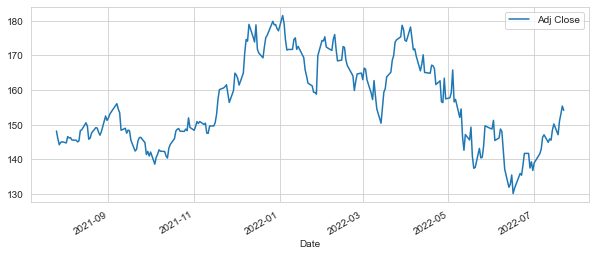

In [15]:
# visualizing the apple stock within the last year with pandas
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

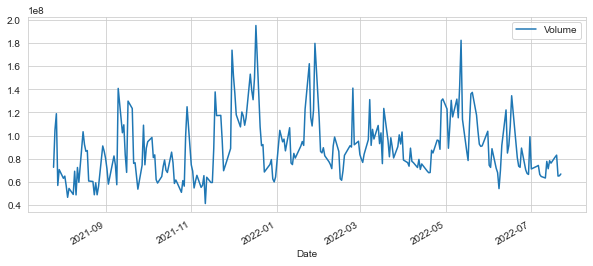

In [17]:
# plotting the total volume of stock traded everyday for the last year

AAPL['Volume'].plot(legend=True, figsize=(10,4));

In [23]:
# calculate the moving average for the stock 

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

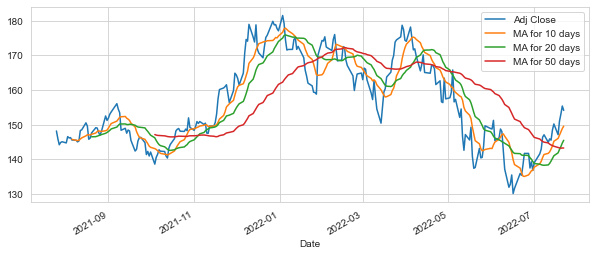

In [25]:
# moving averages plotted on top of the adjusted close for the last year

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

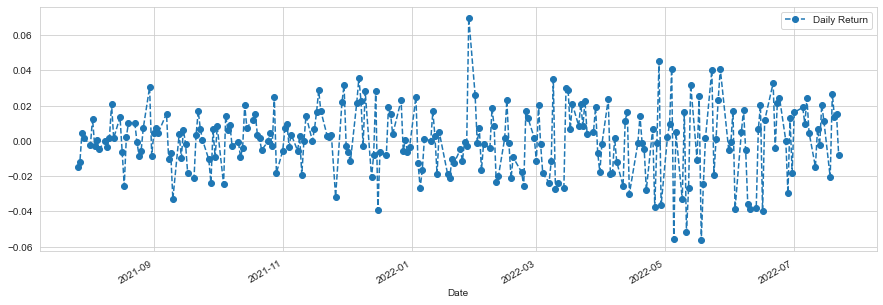

In [29]:
# retreiving daily returns for AAPL

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(15,5), legend=True, linestyle='--', marker='o')

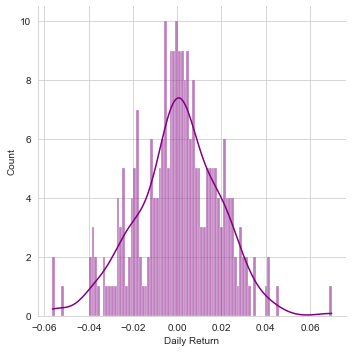

In [36]:
# histogram with a KDE plot showing the daily returns of apple

sns.displot(AAPL['Daily Return'].dropna(), 
            bins=100, 
            color='purple',
           kde=True)

<AxesSubplot:>

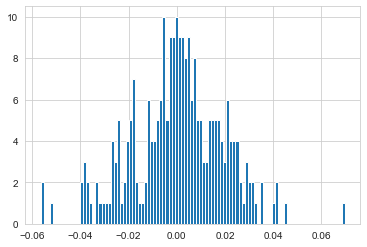

In [37]:
# Pandas built in histogram for the same data
AAPL['Daily Return'].hist(bins=100)

In [40]:
# creating a data frame with all the closing data from all the stocks

close_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
close_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-26,148.143631,139.644501,286.708832,184.990997
2021-07-27,145.936249,136.796494,284.219208,181.319504
2021-07-28,144.156387,136.381500,283.901764,181.516006
2021-07-29,144.812653,136.540497,284.179504,179.996002
2021-07-30,145.031387,135.220993,282.602386,166.379501
...,...,...,...,...
2022-07-18,147.070007,109.910004,254.250000,113.760002
2022-07-19,151.000000,114.620003,259.529999,118.209999
2022-07-20,153.039993,114.699997,262.269989,122.769997


In [41]:
tech_rets = close_df.pct_change()

In [42]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-26,NaN,NaN,NaN,NaN
2021-07-27,-0.014900,-0.020395,-0.008683,-0.019847
2021-07-28,-0.012196,-0.003034,-0.001117,0.001084
2021-07-29,0.004552,0.001166,0.000978,-0.008374
2021-07-30,0.001510,-0.009664,-0.005550,-0.075649
...,...,...,...,...
2022-07-18,-0.020643,-0.025335,-0.009621,0.001849
2022-07-19,0.026722,0.042853,0.020767,0.039117
2022-07-20,0.013510,0.000698,0.010558,0.038575


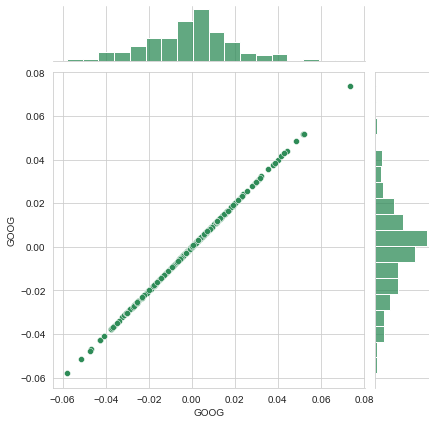

In [44]:
# comparing google to itself using jointplot

sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

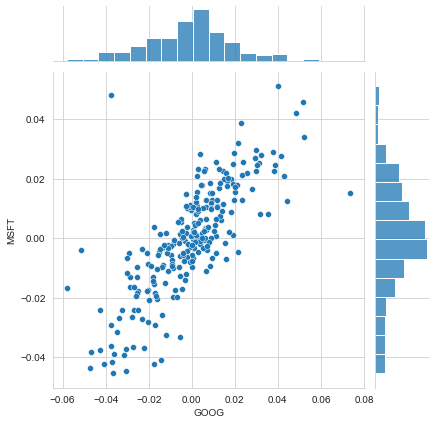

In [47]:
# comparing google to microsoft using jointplot for the price returns

sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

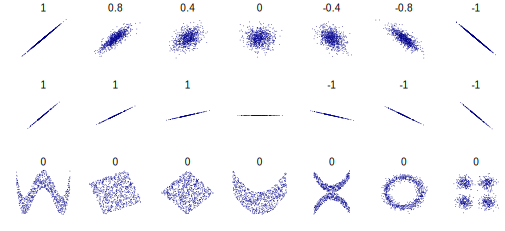

In [49]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

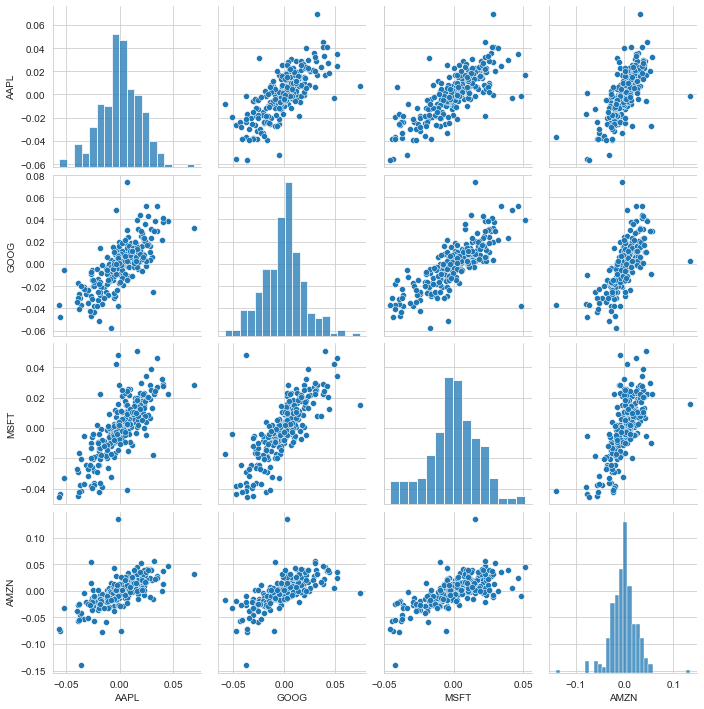

In [50]:
# using seaborn and pandas to make a comparison analysis for every combination of stock

# histograms of the combination of the stock ^2, correlations of the stocks vs other stocks, almost all 
# are near 0.7-0.8

sns.pairplot(tech_rets.dropna())

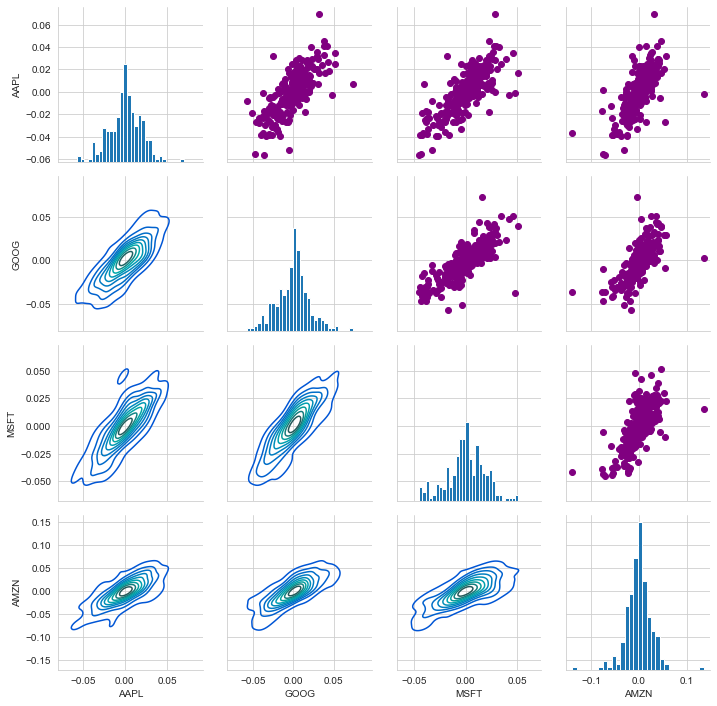

In [54]:
# creating a custom plot for any parameters to be thought of
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='winter_d')
returns_fig.map_diag(plt.hist, bins=30)

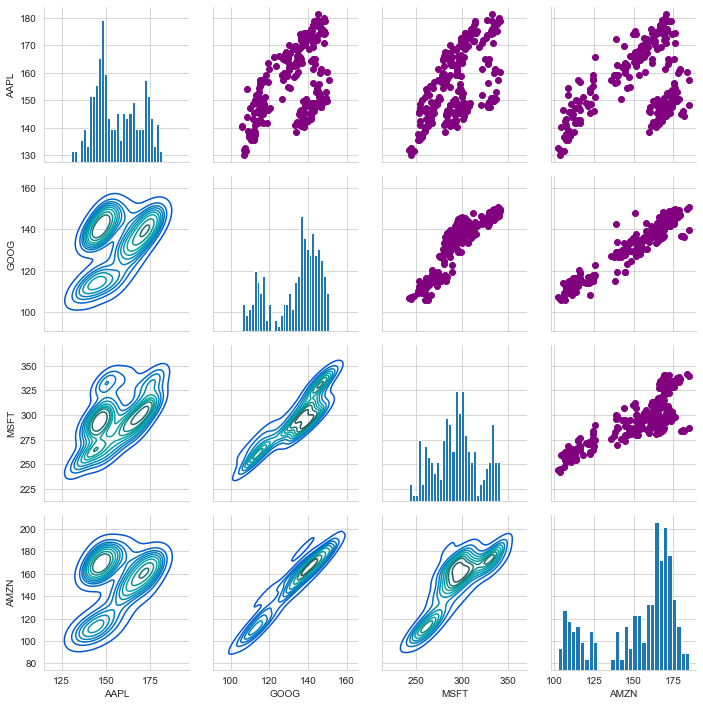

In [55]:
# analyzing the correlations of the closing prices

returns_fig = sns.PairGrid(close_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='winter_d')
returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

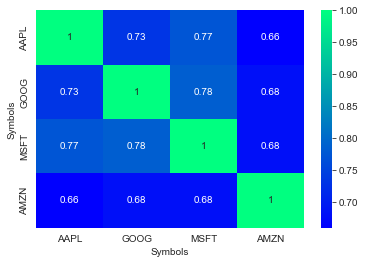

In [63]:
# heat map of correlation from the tech_rets df

sns.heatmap(tech_rets.dropna().corr(), annot=True, cmap='winter')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

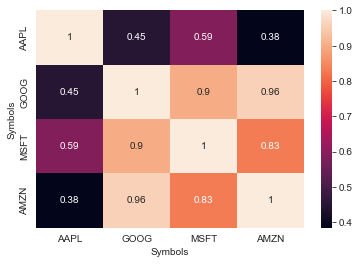

In [66]:
# correlations between the close_df 

sns.heatmap(close_df.corr(), annot=True)

In [67]:
# analyzing the stock risk and how to quantify the risk of the stock


# new df with dropped values
rets = tech_rets.dropna()

Text(0, 0.5, 'Risk')

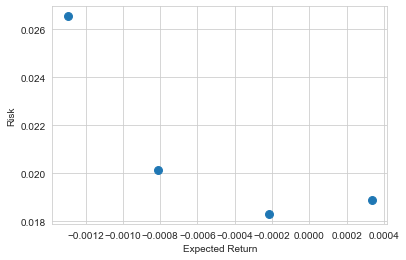

In [72]:
# creating the area for the circles
area = np.pi * 20

# scatter plot
plt.scatter(rets.mean(), rets.std(), s= area)

# axis / titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')


# # for the columns, set x = mean, y = std, w/ plt annotate, create label and all the parameters
# for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
#     plt.annotate(
#         label,
#         xy = (x, y), ytext = (50,50),
#         xytext = 'offset points', ha= 'right', va= 'bottom', 
#         arrowprops = dict(arrowstyle= '-', connectionstyle = 'arc3,rad=-0.3'))

In [76]:
# quantiles
# with 95% confidence, the worst daily loss will not exceed 3.25%
rets['AAPL'].quantile(0.05)

-0.032461382867950916

In [77]:
# set up our time horizon
days = 365

# delta 
dt = 1/days

# get the mu (drift) from the expected return data we got from AAPL
mu = rets.mean()['GOOG']

# get the volitility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [78]:
def stock_monte_carlo(start_price, days, mu, sigma):
    # three arrays that are full of 0's and set the first term to starting price
    price = np.zeros(days)
    price[0] = start_price
    
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        # calculate the shock term of the equation
        shock[x] = np.random.normal(loc=mu * dt, scale= sigma * np.sqrt(dt))
        # calculate the drift term of the equation
        drift[x] = mu * dt
        # final equations and return price array
        price[x] = price[x - 1] + (price[x - 1] * drift[x] + shock[x])
    
    return price

In [80]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,139.712997,137.651001,138.250000,139.644501,23052000.0,139.644501
2021-07-27,140.011002,135.100006,140.011002,136.796494,42164000.0,136.796494
2021-07-28,139.675995,136.350006,138.561996,136.381500,54688000.0,136.381500
2021-07-29,137.151505,136.138000,136.380600,136.540497,19284000.0,136.540497
2021-07-30,135.771347,134.814194,135.511002,135.220993,23954000.0,135.220993
...,...,...,...,...,...,...
2022-07-18,114.800003,109.300003,113.440002,109.910004,33354000.0,109.910004
2022-07-19,114.809998,110.500000,111.730003,114.620003,30992300.0,114.620003
2022-07-20,116.330002,113.260002,114.059998,114.699997,26780100.0,114.699997


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

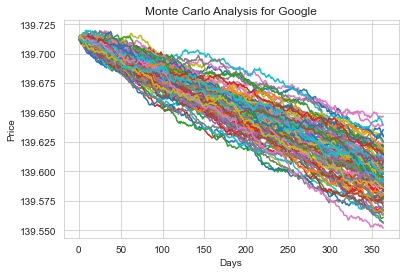

In [81]:
start_price = GOOG.High[0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [82]:
runs = 10000

sims = np.zeros(runs)

for run in range(runs):
    sims[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

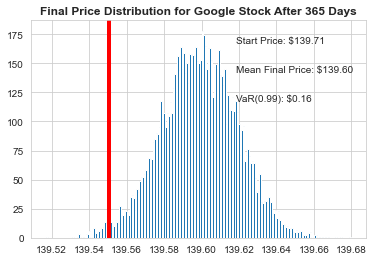

In [83]:
# plotting a histogram usisng quantiles to calculate the risk of the stock

q = np.percentile(sims, 1)

plt.hist(sims, bins=200)

# starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f'%start_price)

# mean ending price
plt.figtext(0.6, 0.7, 'Mean Final Price: $%.2f'%sims.mean())

# variance fo the price ( w/ 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f'%(start_price - q))

# display the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

# title 
plt.title(u'Final Price Distribution for Google Stock After %s Days'%days, weight='bold');